<a href="https://colab.research.google.com/github/RashelGarg/Exploratory-Data-Analysis/blob/main/EDA_Th_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#https://github.com/RashelGarg/Exploratory-Data-Analysis

# RASHEL GARG 21BDS0331
#EDA THEORY DA

Module 2: Data Transformation

In [4]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/telco customer churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<ipython-input-9-6f0276a5ed6a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


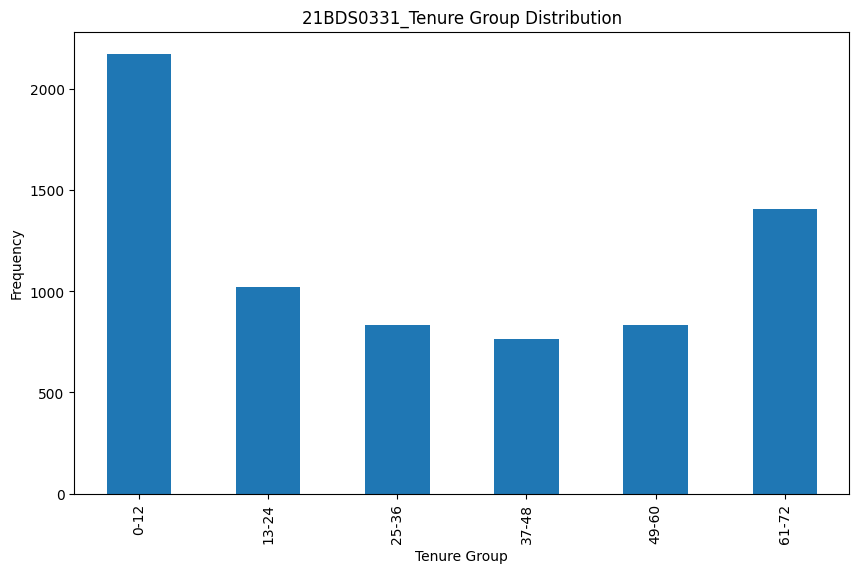

In [9]:
import matplotlib.pyplot as plt
# Convert 'TotalCharges' and 'tenure' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Replace missing values in 'TotalCharges' with the median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Data deduplication
df = df.drop_duplicates()

# Discretization (e.g., binning 'tenure' into categories)
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                              labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Visualization of tenure_group distribution
plt.figure(figsize=(10, 6))
df['tenure_group'].value_counts().sort_index().plot(kind='bar')
plt.title("21BDS0331_Tenure Group Distribution")
plt.xlabel("Tenure Group")
plt.ylabel("Frequency")
plt.show()

In [15]:
# View basic structure and summary
print(df.info())
print(df.describe())

#Performing data deduplication

df.duplicated()

# Now, we can drop these duplicates using the drop_duplicates() method:
print(df.shape)
df1 = df.drop_duplicates()
print(df1)
print("Shape Of Data Set After Dropping Duplicates:")
print(df1.shape)



# Check for duplicates
duplicates = df.duplicated().sum()

# Drop duplicate rows
data_deduplicated = df.drop_duplicates()
print(f"Number of duplicates removed: {duplicates}")

# Checking for missing data
missing_data = data_deduplicated.isnull().sum()
print(missing_data)
# Fill missing numerical data with mean
data_deduplicated.fillna(data_deduplicated.mean(numeric_only=True), inplace=True)
print(data_deduplicated)
# Fill missing categorical data with mode
for column in data_deduplicated.select_dtypes(include=['object']).columns:
    data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)

# Check missing data after filling
data_deduplicated.isnull().sum()

df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7035 non-null   float64 
 3   Partner           7038 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7041 non-null   float64 
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

<ipython-input-15-476b7188cd29>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_deduplicated[column].fillna(data_deduplicated[column].mode()[0], inplace=True)


,0
customerID,object
gender,object
SeniorCitizen,float64
Partner,object
Dependents,object
tenure,float64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Module 3: Correlation Analysis and Time Series Analysis

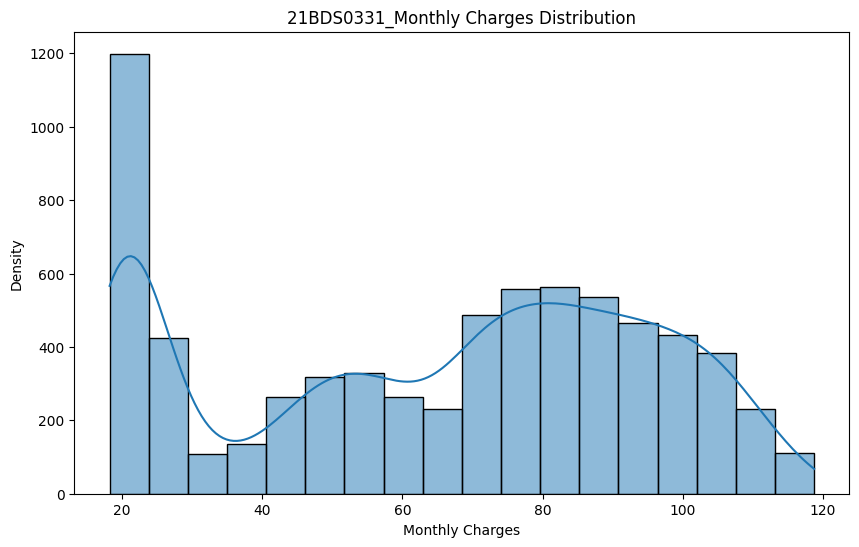

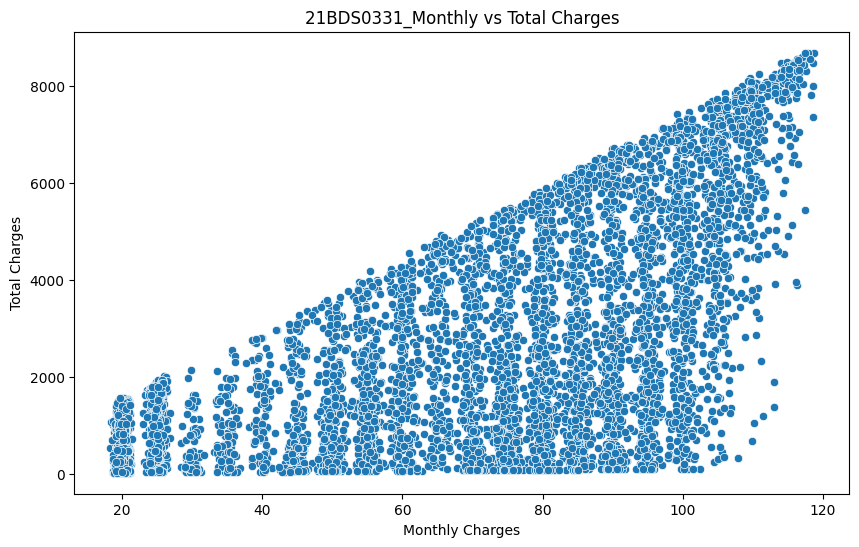

In [10]:
import seaborn as sns

# Univariate Analysis (e.g., Distribution of MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("21BDS0331_Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.show()

# Bivariate Analysis (e.g., Scatter plot of MonthlyCharges vs. TotalCharges)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title("21BDS0331_Monthly vs Total Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()


Module 4: Data Summarization and Visualization

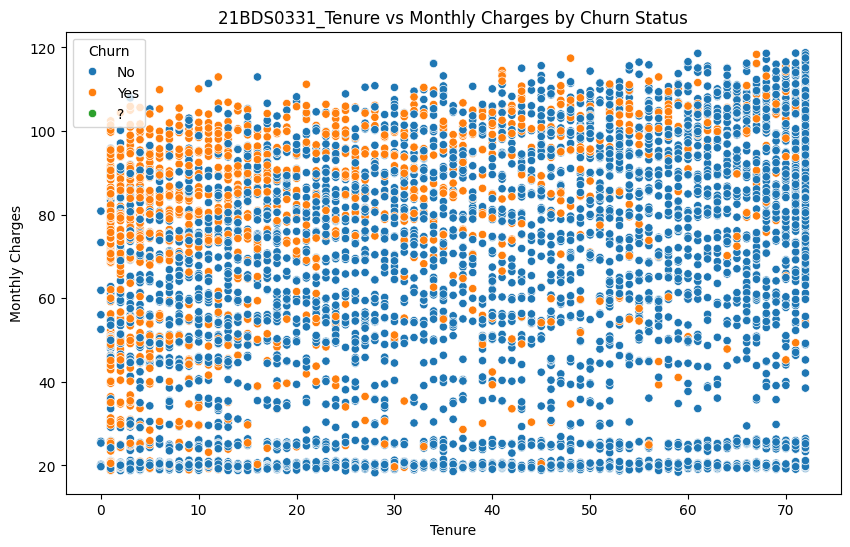

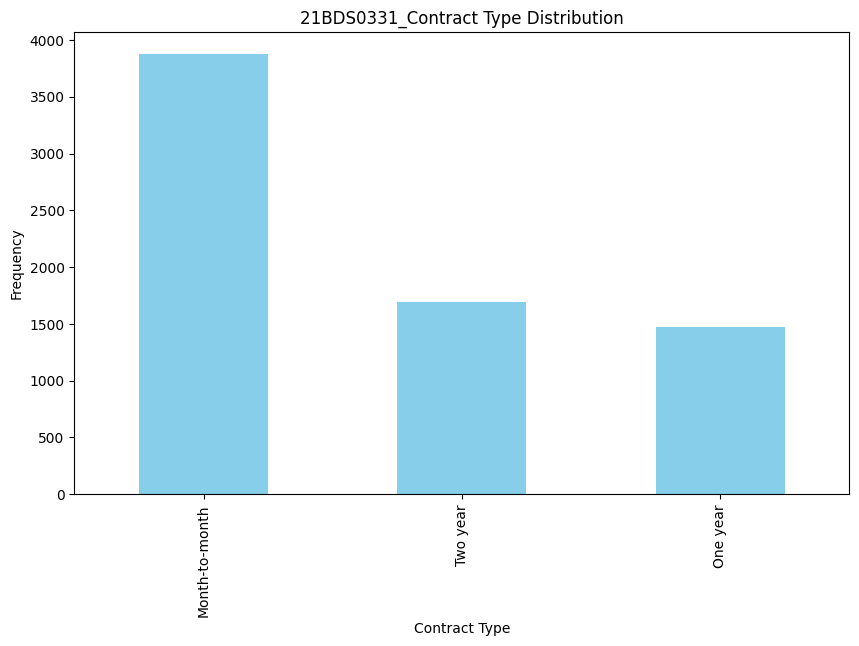

In [11]:
# Scatter plot example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("21BDS0331_Tenure vs Monthly Charges by Churn Status")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

# Bar plot example: Churn by contract type
plt.figure(figsize=(10, 6))
df['Contract'].value_counts().plot(kind='bar', color='skyblue')
plt.title("21BDS0331_Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Frequency")
plt.show()


Module 5: Clustering Algorithms

Hierarchical Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7035 non-null   float64 
 3   Partner           7038 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7041 non-null   float64 
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

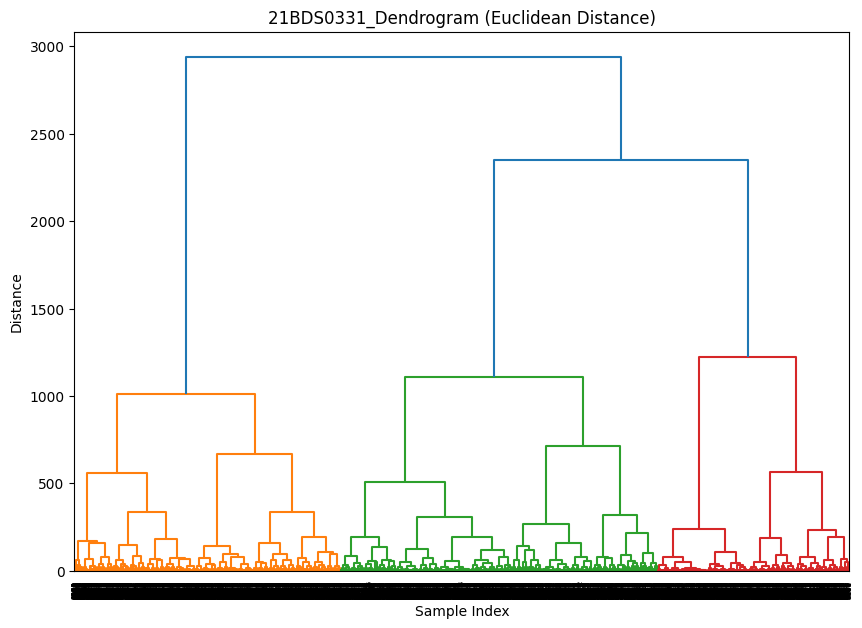

In [12]:
# Import necessary libraries
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Selecting relevant columns ('MonthlyCharges' and 'tenure')
df_selected = df[['MonthlyCharges', 'tenure']]

# Check for missing values and handle them
if df_selected.isna().sum().sum() > 0:
    # Option 1: Remove rows with missing values
    df_selected = df_selected.dropna()

    # Option 2: Impute missing values with column means (uncomment if desired)
    # df_selected.fillna(df_selected.mean(), inplace=True)

# Display basic statistical summary after preprocessing
print(df_selected.describe())

# Compute distance matrix (using 'euclidean' as the distance measure)
dist_matrix = pdist(df_selected, metric='euclidean')

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(dist_matrix, method='ward')

# Visualize dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("21BDS0331_Dendrogram (Euclidean Distance)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

K-Means

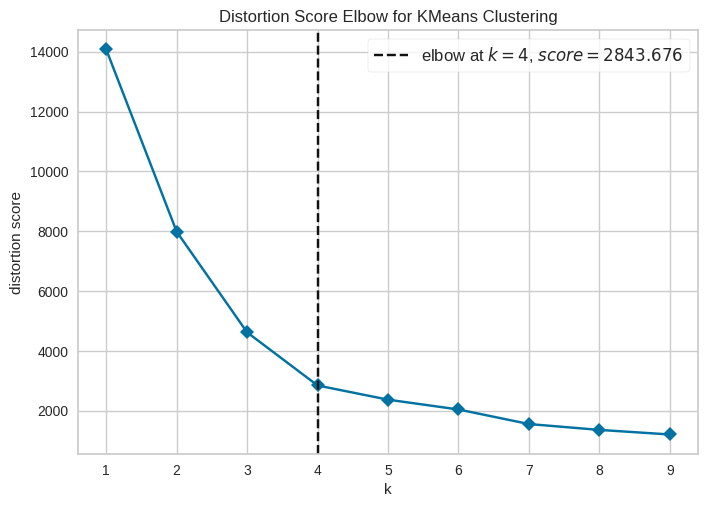

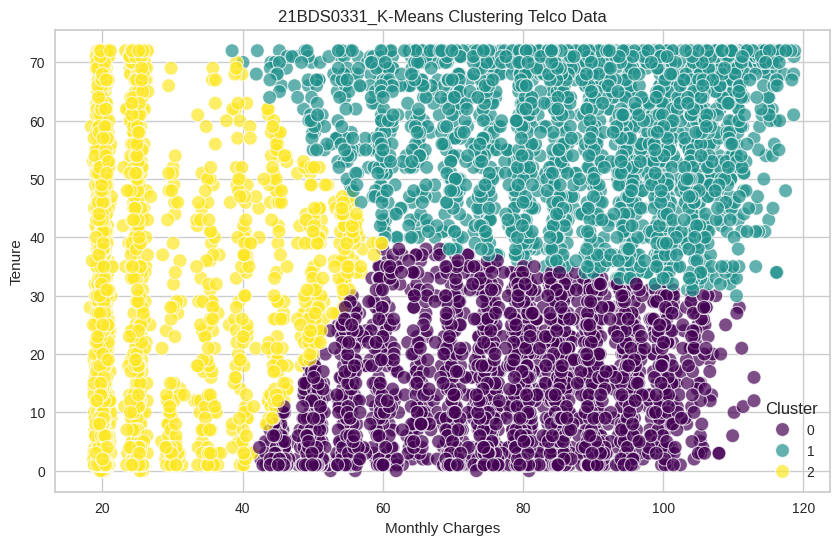

Cluster Centers (in original scale):
[[74.99249904 12.5510907 ]
 [88.96784151 57.92732049]
 [26.47891172 29.29051845]]
Labels assigned to each data point:
[2 2 0 ... 2 0 1]


In [14]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Select relevant columns and ensure numeric type
# Columns: 'MonthlyCharges' and 'tenure'
dataset = df[['MonthlyCharges', 'tenure']].dropna()
dataset = dataset.apply(pd.to_numeric)  # Ensure all data is numeric


# Standardize the data for better clustering performance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)

# Determine the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(data_scaled)
visualizer.show()  # Display Elbow plot

# Set the number of clusters based on the Elbow plot
num_clusters = 3  # This value may change based on the Elbow method output

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=123, n_init=25)
kmeans.fit(data_scaled)

# Add the cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

# Visualize K-means clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='MonthlyCharges', y='tenure', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title("21BDS0331_K-Means Clustering Telco Data")
plt.xlabel("Monthly Charges")
plt.ylabel("Tenure")
plt.legend(title='Cluster')
plt.show()  # Display clustering plot

# Print the clustering results (centroids and labels)
print("Cluster Centers (in original scale):")
print(scaler.inverse_transform(kmeans.cluster_centers_))
print("Labels assigned to each data point:")
print(kmeans.labels_)

Module 6: Dimensionality Reduction (PCA)

<class 'pandas.core.frame.DataFrame'>
Index: 7038 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7038 non-null   float64
 1   tenure          7038 non-null   float64
dtypes: float64(2)
memory usage: 165.0 KB
None
       MonthlyCharges       tenure
count     7038.000000  7038.000000
mean        64.769722    32.368997
std         30.087391    24.560062
min         18.250000     0.000000
25%         35.512500     9.000000
50%         70.350000    29.000000
75%         89.850000    55.000000
max        118.750000    72.000000
Explained Variance by each component: [0.62397948 0.37602052]


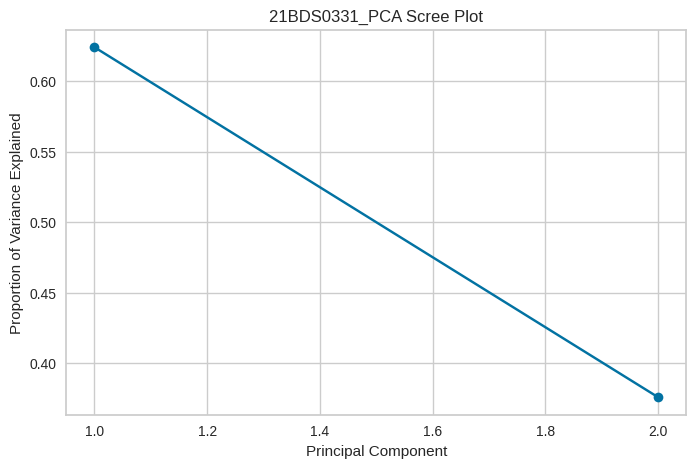

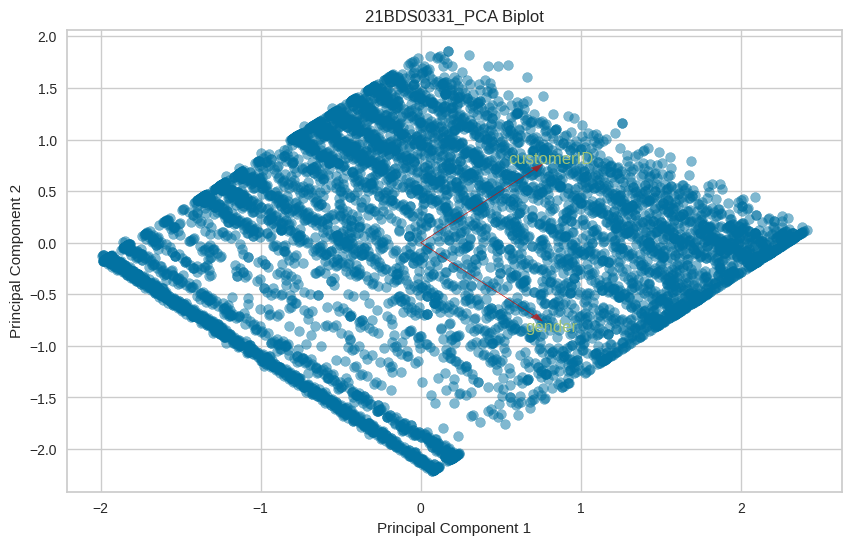

In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select relevant columns for PCA and ensure they are numeric
pca_data = df[['MonthlyCharges', 'tenure']].dropna()
pca_data = pca_data.apply(pd.to_numeric)  # Convert columns to numeric

# Check the structure and summary of the data
print(pca_data.info())
print(pca_data.describe())

# Standardize the data for PCA
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit(pca_data_scaled)

# Summary of PCA - Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each component:", explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='b')
plt.title("21BDS0331_PCA Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)
plt.show()

# Biplot for the first two principal components
pca_data_transformed = pca.transform(pca_data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data_transformed[:, 0], pca_data_transformed[:, 1], alpha=0.5, c='b', s=50)
for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7, head_width=0.05)
    plt.text(pc1 * 1.15, pc2 * 1.15, df.columns[i], color='g', ha='center', va='center')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("21BDS0331_PCA Biplot")
plt.grid(True)
plt.show()